## Parzen windows bayesian classifier

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import math
from scipy.stats import multivariate_normal

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

In [4]:
def hypercube_kernel(h, x, x_i):
    u = np.linalg.norm(x-x_i)
    if u>0.5*h:
        return 0
    else:
        return 1
    
def gaussian_kernel(h, x, x_i, sigma=0.1):
    rv = multivariate_normal(mean=0, cov=sigma)
    return rv.pdf((x-x_i)/float(h))
    

def parzen_window(X, x, h, kernel_func):
    c = np.sum([kernel_func(h, x, z) for z in X])
    m = 1.0/(X.shape[0]*math.pow(h,X.shape[1]))
    return m*c


def parzen(X, X1, h, kernel_func):
    res = []
    for x in X1:
        res.append(parzen_window(X, x, h, kernel_func))
    return np.array(res)

In [5]:
df = pd.read_csv('../dataset/knnClassify3c.csv', delimiter=';')
dft = pd.read_csv('../dataset/knnClassify3c-test.csv', delimiter=';')

In [6]:
x1min=min(min(df.x1),min(dft.x1))
x1max=max(max(df.x1),max(dft.x1))
x2min=min(min(df.x2),min(dft.x2))
x2max=max(max(df.x2),max(dft.x2))

x1min=x1min-(x1max-x1min)/10
x1max=x1max+(x1max-x1min)/10
x2min=x2min-(x2max-x2min)/10
x2max=x2max+(x2max-x2min)/10

classes=[ x for x in df['class'].unique()]
nclasses = len(classes)

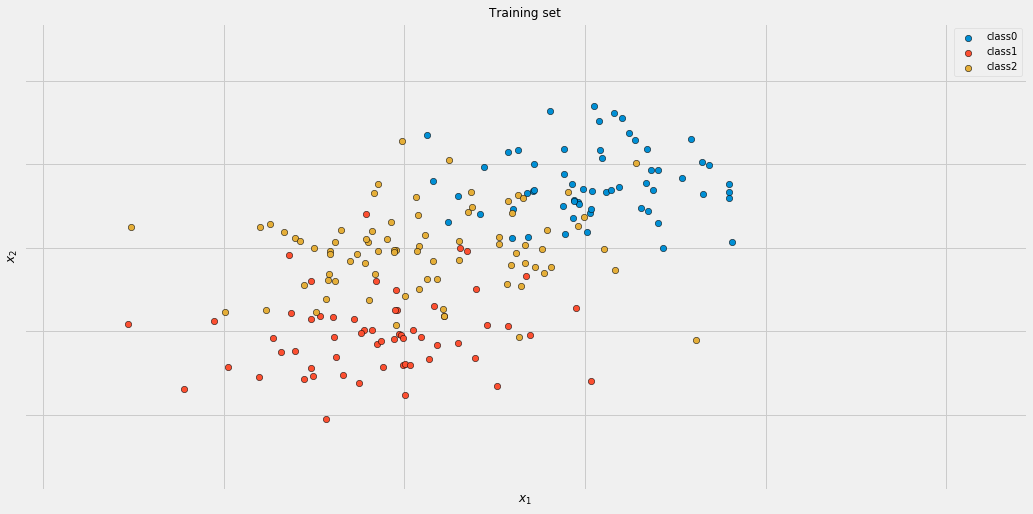

In [12]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
plt.tick_params(which='both', bottom='off', left='off', labelbottom='off', labelleft='off')
for i, cl in enumerate(classes):
    data = df[df['class']==cl]
    plt.scatter(data.x1,data.x2, c=colors[i], edgecolors='k', s=40, marker='o', alpha=1, label='class'+str(i))
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('Training set', fontsize=12)
plt.legend()
plt.show()

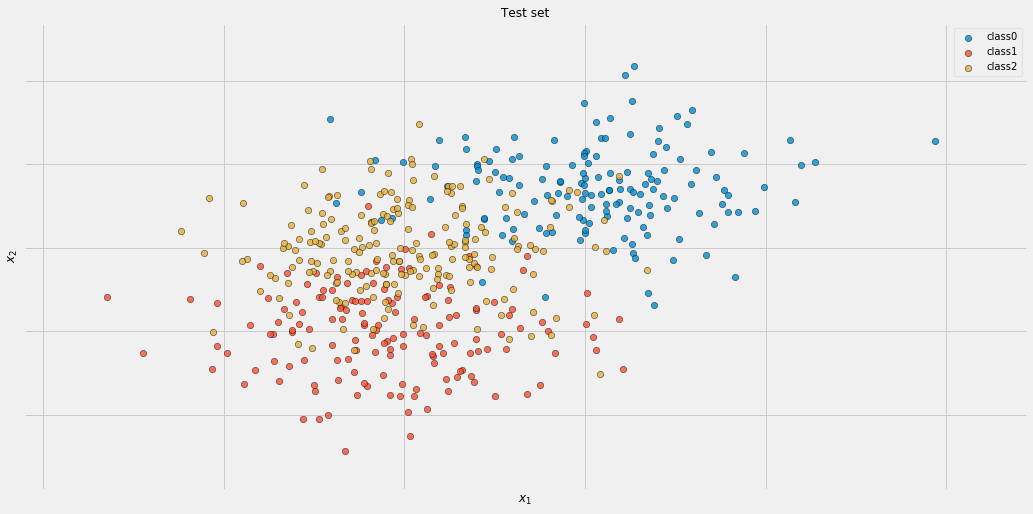

In [13]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
plt.tick_params(which='both', bottom='off', left='off', labelbottom='off', labelleft='off')
for i, cl in enumerate(classes):
    datat = dft[dft['class']==cl]
    plt.scatter(datat.x1,datat.x2, c=colors[i], edgecolors='k', s=40, marker='o', alpha=.8, label='class'+str(i))
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('Test set', fontsize=12)
plt.legend()
plt.show()

In [14]:
x = np.linspace(x1min,x1max, 100)
y = np.linspace(x2min,x2max, 100)

xx, yy = np.meshgrid(x, y)
xy = np.c_[xx.ravel(), yy.ravel()]

x_train=np.asarray(df[['x1','x2']])
x_train_0=np.asarray(df[df['class']==1][['x1','x2']])
x_train_1=np.asarray(df[df['class']==2][['x1','x2']])
x_train_2=np.asarray(df[df['class']==3][['x1','x2']])
y_train=df['class']
x_test=np.asarray(dft[['x1','x2']])
y_test=dft['class']

In [15]:
n = x_train.shape[0]
p0 = x_train_0.shape[0]/float(n)
p1 = x_train_1.shape[0]/float(n)
p2 = x_train_2.shape[0]/float(n)

print('Prior probabilities')
print('Class 0: {0:3.5f}'.format(p0))
print('Class 1: {0:3.5f}'.format(p1))
print('Class 2: {0:3.5f}'.format(p2))

Prior probabilities
Class 0: 0.30000
Class 1: 0.30000
Class 2: 0.40000


In [16]:
cMap = mcolors.ListedColormap(colors[0:3])

In [30]:
h=5
f = hypercube_kernel
pz0 = parzen(x_train_0,xy,h,f)
pz1 = parzen(x_train_1,xy,h,f)
pz2 = parzen(x_train_2,xy,h,f)
pp0 = pz0.reshape(100, 100)
pp1 = pz1.reshape(100, 100)
pp2 = pz2.reshape(100, 100)

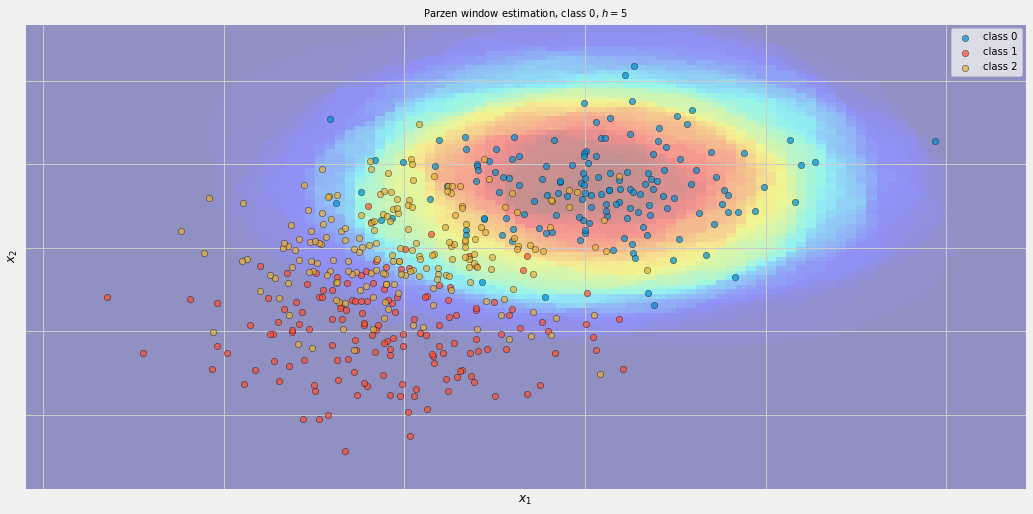

In [31]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
plt.tick_params(which='both', bottom='off', left='off', labelbottom='off', labelleft='off')
plt.imshow(pp0, origin='lower', extent=(x1min,x1max,x2min,x2max), alpha=.4, aspect='auto')
for i, cl in enumerate(classes):
    data = dft[dft['class']==cl]
    plt.scatter(data.x1,data.x2, c=colors[i], edgecolors='k', s=40, marker='o', alpha=.7, label='class {0:d}'.format(int(cl-1)))
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('Parzen window estimation, class 0, $h={0:d}$'.format(h))
plt.legend()
plt.show()

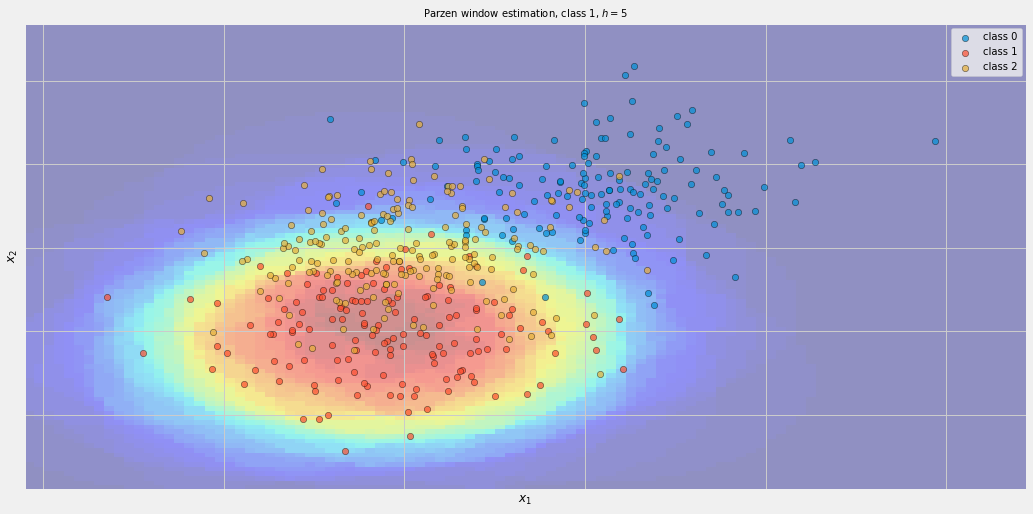

In [32]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
plt.tick_params(which='both', bottom='off', left='off', labelbottom='off', labelleft='off')
plt.imshow(pp1, origin='lower', extent=(x1min,x1max,x2min,x2max), alpha=.4, aspect='auto')
for i, cl in enumerate(classes):
    data = dft[dft['class']==cl]
    plt.scatter(data.x1,data.x2, c=colors[i], edgecolors='k', s=40, marker='o', alpha=.7, label='class '+str(int(cl-1)))
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('Parzen window estimation, class 1, $h={0:d}$'.format(h))
plt.legend()
plt.show()

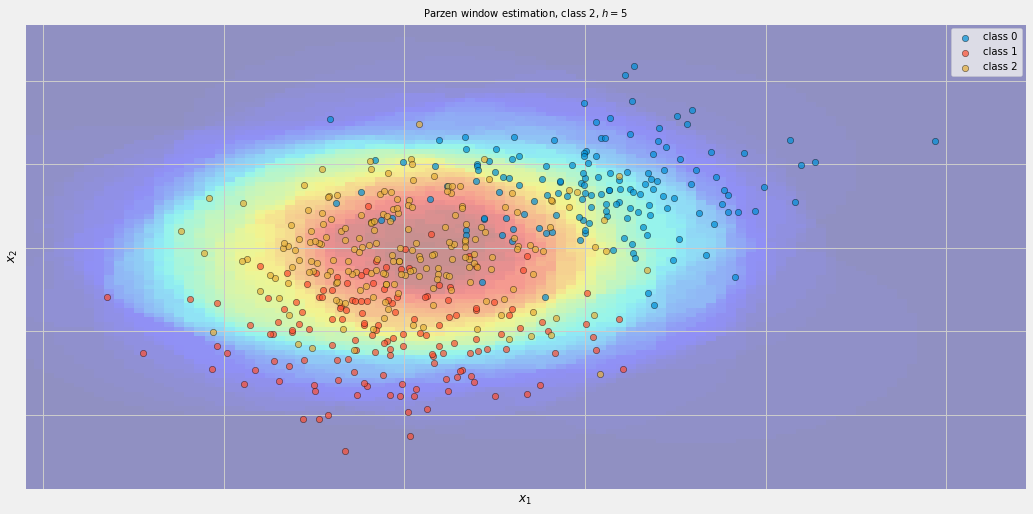

In [33]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
plt.tick_params(which='both', bottom='off', left='off', labelbottom='off', labelleft='off')
plt.imshow(pp2, origin='lower', extent=(x1min,x1max,x2min,x2max), alpha=.4, aspect='auto')
for i, cl in enumerate(classes):
    data = dft[dft['class']==cl]
    plt.scatter(data.x1,data.x2, c=colors[i], edgecolors='k', s=40, marker='o', alpha=.7, label='class '+str(int(cl-1)))
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('Parzen window estimation, class 2, $h={0:d}$'.format(h))
plt.legend()
plt.show()

In [22]:
rr = []
for i in range(len(pz0)):
    rr.append(np.argmax(np.array([pz0[i]*p0, pz1[i]*p1, pz2[i]*p2])))
est = np.array(rr).reshape(100,100)

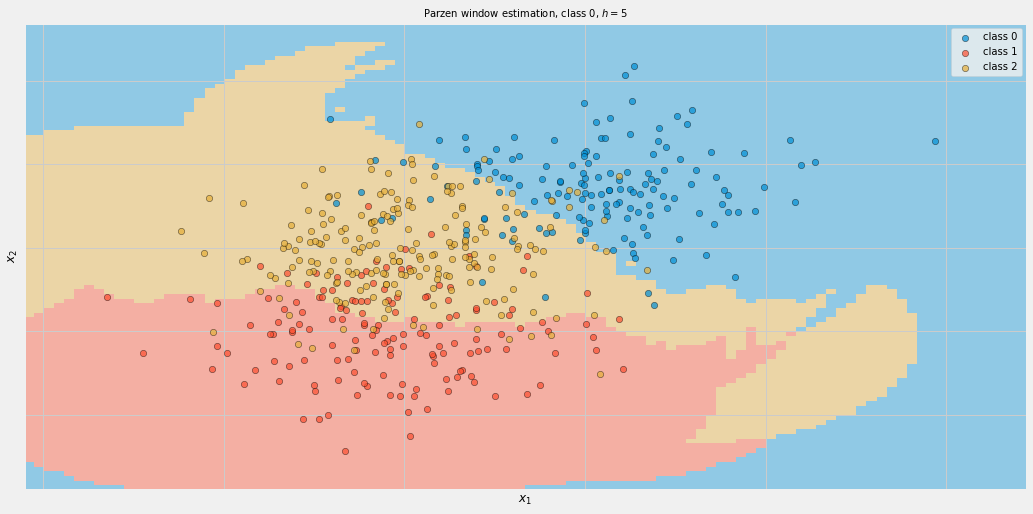

In [23]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
plt.tick_params(which='both', bottom='off', left='off', labelbottom='off', labelleft='off')
plt.imshow(est, origin='lower', extent=(x1min,x1max,x2min,x2max), alpha=.4, cmap = cMap, aspect='auto')
for i, cl in enumerate(classes):
    data = dft[dft['class']==cl]
    plt.scatter(data.x1,data.x2, c=colors[i], edgecolors='k', s=40, marker='o', alpha=.7, label='class '+str(int(cl-1)))
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('Parzen window bayesian classification, hypercube kernel: $h={0:d}$'.format(h))
plt.legend()
plt.show()

In [24]:
h=5
pp0 = parzen(x_train_0,x_test,h,gaussian_kernel)*p0
pp1 = parzen(x_train_1,x_test,h,gaussian_kernel)*p1
pp2 = parzen(x_train_2,x_test,h,gaussian_kernel)*p2

In [35]:
rr = []
for i in range(len(pz0)):
    rr.append(np.argmax(np.array([pz0[i]*p0, pz1[i]*p1, pz2[i]*p2])))
est = np.array(rr).reshape(100,100)

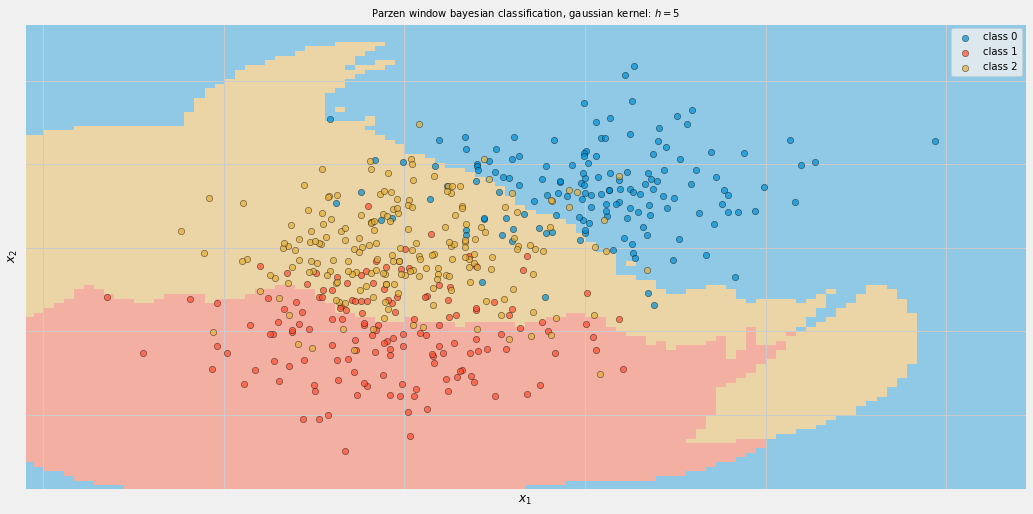

In [27]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
plt.tick_params(which='both', bottom='off', left='off', labelbottom='off', labelleft='off')
plt.imshow(est, origin='lower', extent=(x1min,x1max,x2min,x2max), alpha=.4, cmap = cMap, aspect='auto')
for i, cl in enumerate(classes):
    data = dft[dft['class']==cl]
    plt.scatter(data.x1,data.x2, c=colors[i], edgecolors='k', s=40, marker='o', alpha=.7, label='class '+str(int(cl-1)))
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('Parzen window bayesian classification, gaussian kernel: $h={0:d}$'.format(h))
plt.legend()
plt.show()

In [28]:
p = np.array([pp0,pp1,pp2])
preds = []
for i in range(pp0.shape[0]):
    preds.append(np.argmax(p[:,i]))

In [29]:
acc = sum([preds[i]+1==y_test[i] for i in range(pp0.shape[0])])/float(x_test.shape[0])
print('Accuracy: {0:3.5f}'.format(acc))

Accuracy: 0.71600


In [24]:
accs = []
for h in range(1,12):
    pp0 = parzen(x_train_0,x_test,h,hypercube_kernel)*p0
    pp1 = parzen(x_train_1,x_test,h,hypercube_kernel)*p1
    pp2 = parzen(x_train_2,x_test,h,hypercube_kernel)*p2
    p = np.array([pp0,pp1,pp2])
    preds = []
    for i in range(pp0.shape[0]):
        preds.append(np.argmax(p[:,i]))
    accs.append(sum([preds[i]+1==y_test[i] for i in range(pp0.shape[0])])/float(x_test.shape[0]))

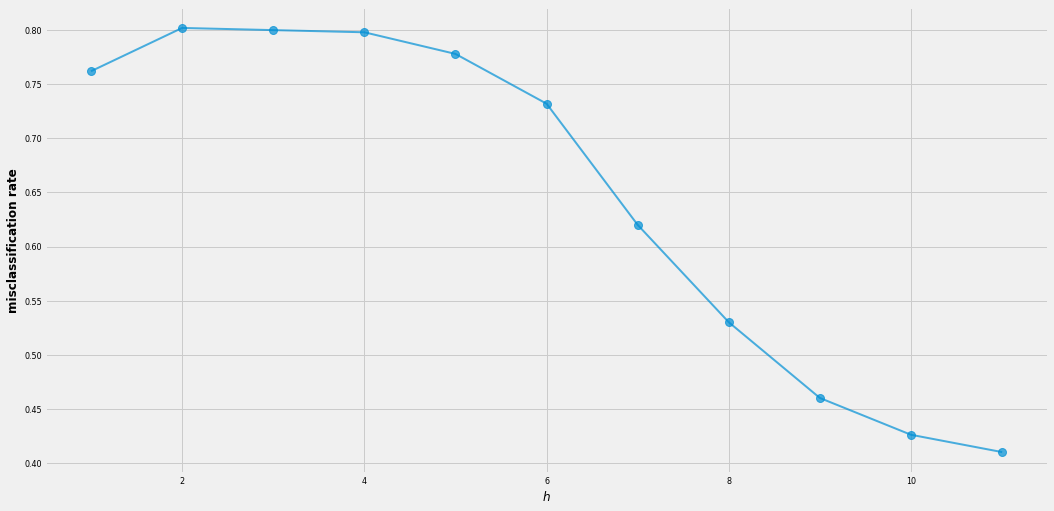

In [25]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
plt.tick_params(axis='both', which='major', labelsize=8)
plt.plot(range(1,12), accs, 'o-', color=colors[0], markersize=8, alpha=.7)
plt.xlabel('$h$', fontsize=12)
plt.ylabel('misclassification rate', fontsize=12)
plt.show()